In [2]:
!mamba install -y -c conda-forge seaborn

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
import json
from cartopy import crs
from cartopy import feature as cf
import seaborn as sns

# import geoviews as gv
# import geoviews.feature as gf
# from geoviews import opts

# gv.extension('bokeh', 'matplotlib')

%matplotlib notebook

conda-forge/win-64                                          Using cache
conda-forge/noarch                                          Using cache
Transaction

  Prefix: C:\ANACON~1\envs\airprox\envs\airprox

  Updating specs:

   - seaborn
   - ca-certificates
   - certifi
   - openssl


  Package         Version  Build            Channel                 Size
--------------------------------------------------------------------------
  Install:
--------------------------------------------------------------------------

  + patsy           0.5.2  pyhd8ed1ab_0     conda-forge/noarch     193kB
  + seaborn        0.11.2  hd8ed1ab_0       conda-forge/noarch       4kB
  + seaborn-base   0.11.2  pyhd8ed1ab_0     conda-forge/noarch     229kB
  + statsmodels    0.13.2  py310h2873277_0  conda-forge/win-64      11MB

  Summary:

  Install: 4 packages

  Total download: 11MB

--------------------------------------------------------------------------


Looking for: ['seaborn']


Pinned packages:
  - p

menuinst called from non-root env C:\ANACON~1\envs\airprox\envs\airprox


In [172]:
data_req = requests.get('https://www.cadnodevelopment.com/AirProx/Home/GetAirProx?Dates=2000-01-01T00:00:00.000Z 2021-12-31T23:59:59.999Z&ac1Classifications=All&ac1Categories=All&ac1Types=All&ac1FlightRules=All&ac2Classifications=All&ac2Categories=All&ac2Types=All&ac2FlightRules=All')
data_req.content

b'{"AirProx":[{"AirproxID":2010001,"Date":"\\/Date(1263686400000)\\/","Latitude":51.3166666666667,"Longitude":0.0166666666666667,"Altitude":"1000","Risk":"B","Aircraft1_Classification":"General Aviation","Aircraft1_Category":"Fixed Wing - Aeroplane","Aircraft1_Type":"CESSNA - 172","Aircraft1_FlightRules":"VFR","Aircraft2_Classification":"General Aviation","Aircraft2_Category":"Fixed Wing - Aeroplane","Aircraft2_Type":"CESSNA - 680","Aircraft2_FlightRules":"IFR","Href":"uploadedFiles/Content/Standard_content/Airprox_report_files/2010/Airprox Report 2010001.pdf                                                                                                                                                                    "},{"AirproxID":2010010,"Date":"\\/Date(1267488000000)\\/","Latitude":55.0166666666667,"Longitude":-1.96666666666667,"Altitude":"2900","Risk":"C","Aircraft1_Classification":"Commercial Air Transport","Aircraft1_Category":"Fixed Wing - Aeroplane","Aircraft1_Type":"EMBRAER

In [164]:
data_json = data_req.json()
data_str = json.dumps(data_json['AirProx'])

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
data_str

'[{"AirproxID": 2010001, "Date": "/Date(1263686400000)/", "Latitude": 51.3166666666667, "Longitude": 0.0166666666666667, "Altitude": "1000", "Risk": "B", "Aircraft1_Classification": "General Aviation", "Aircraft1_Category": "Fixed Wing - Aeroplane", "Aircraft1_Type": "CESSNA - 172", "Aircraft1_FlightRules": "VFR", "Aircraft2_Classification": "General Aviation", "Aircraft2_Category": "Fixed Wing - Aeroplane", "Aircraft2_Type": "CESSNA - 680", "Aircraft2_FlightRules": "IFR", "Href": "uploadedFiles/Content/Standard_content/Airprox_report_files/2010/Airprox Report 2010001.pdf                                                                                                                                                                    "}, {"AirproxID": 2010010, "Date": "/Date(1267488000000)/", "Latitude": 55.0166666666667, "Longitude": -1.96666666666667, "Altitude": "2900", "Risk": "C", "Aircraft1_Classification": "Commercial Air Transport", "Aircraft1_Category": "Fixed Wing - Aeroplane",

In [6]:
data_df = pd.read_json(data_str, orient='records', encoding_errors='replace')
data_df = data_df.drop(labels=['AirproxID', 'Href'], axis=1)
data_df['Date'] = pd.to_datetime(data_df['Date'].apply(lambda x: int(''.join(filter(str.isdigit, x)))), unit='ms')
data_df = data_df.sort_values('Date')
data_df['Altitude'] = data_df['Altitude'].astype(float)

In [137]:
data_df.head()

Date   Latitude  Longitude  Altitude Risk  \
2118 2000-02-02  50.616667  -2.000000    1500.0    C   
2119 2000-02-05  51.533333  -2.150000    1400.0    B   
2120 2000-02-07  51.333333   0.033333    9000.0    C   
2122 2000-02-09  51.566667  -2.500000    3000.0    C   
2121 2000-02-09  51.183333   0.433333   12000.0    C   

      Aircraft1_Classification                         Aircraft1_Category  \
2118                  Military                        MILITARY HELICOPTER   
2119                  Military                            MILITARY GLIDER   
2120  Commercial Air Transport  CIVIL AIR TRANSPORT (SCHEDULED PASSENGER)   
2122  Commercial Air Transport  CIVIL AIR TRANSPORT (SCHEDULED PASSENGER)   
2121  Commercial Air Transport  CIVIL AIR TRANSPORT (SCHEDULED PASSENGER)   

                Aircraft1_Type Aircraft1_FlightRules  \
2118             LYNX HAS MK 3                  NONE   
2119  VIKING GLIDER (103 ACRO)               UNKNOWN   
2120               BOEING B757                   IFR   
2122            DHC-8 (DASH 8)                   IFR   
2121               BOEING B767                   IFR   

      Aircraft2_Classification  \
2118          General Aviation   
2119          General Aviation   
2120  Commercial Air Transport   
2122                  Military   
2121  Commercial Air Transport   

                                     Aircraft2_Category Aircraft2_Type  \
2118  CIVIL TRAINING(AND TRANSPORT AIRCRAFT ON TRG &...     CESSNA 150   
2119                              CIVIL PRIVATE OR CLUB    TB9 TAMPICO   
2120      CIVIL AIR TRANSPORT (NON-SCHEDULED PASSENGER)    BOEING B737   
2122                                MILITARY FIXED WING         JAGUAR   
2121          CIVIL AIR TRANSPORT (SCHEDULED PASSENGER)    BOEING B767   

     Aircraft2_FlightRules             x             y  
2118                  NONE  5.618195e+06  4.488856e+06  
2119                  NONE  5.523515e+06  4.532795e+06  
2120                   IFR  5.620867e+06  4.655286e+06  
2122                  NONE  5.507537e+06  4.513497e+06  
2121                   IFR  5.649625e+06  4.671763e+06

In [147]:
for col in ['Risk', 'Aircraft1_Classification', 'Aircraft1_Category', 'Aircraft1_FlightRules','Aircraft2_Classification', 'Aircraft2_Category', 'Aircraft2_FlightRules']:
    data_df[col] = data_df[col].apply(lambda x: x.strip().lower().replace(' ', '_'))
    data_df[col] = pd.Categorical(data_df[col])

In [148]:
enc_df = pd.get_dummies(data_df, columns=['Risk', 'Aircraft1_Classification', 'Aircraft1_FlightRules','Aircraft2_Classification', 'Aircraft2_FlightRules'])

<IPython.core.display.Javascript object>


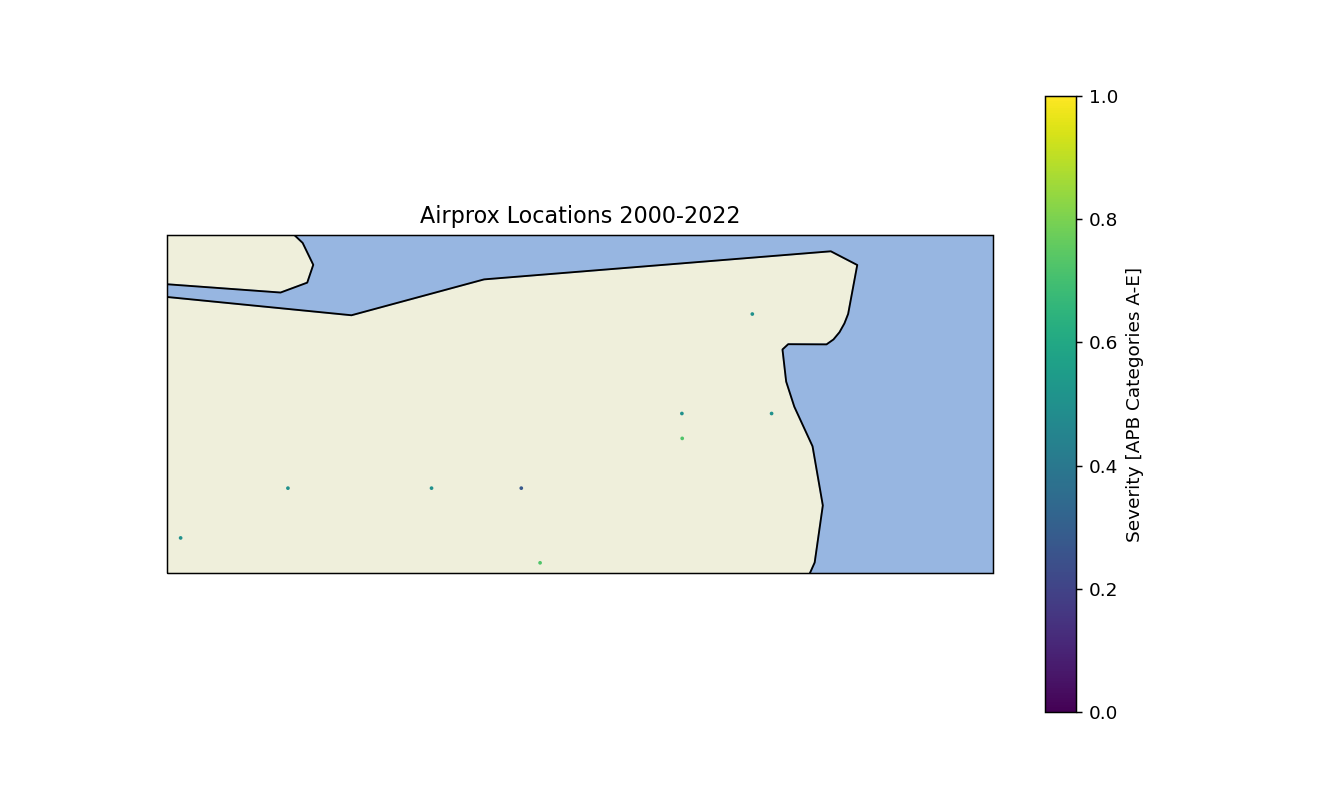

In [159]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=crs.Mollweide())
risk_categories = sorted(list(data_df['Risk'].unique()))
colour_idx = dict(zip(risk_categories, np.linspace(0.95,0.05, len(risk_categories))))
cmap_ = mpl.cm.get_cmap('viridis')
sc = ax.scatter(data_df['Longitude'], data_df['Latitude'], s=1, c=[cmap_(colour_idx[cat]) for cat in data_df['Risk']], transform=crs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAKES)
ax.set_title('Airprox Locations 2000-2022')
fig.colorbar(sc, cmap='inferno', label='Severity [APB Categories A-E]')
fig.show()

<IPython.core.display.Javascript object>


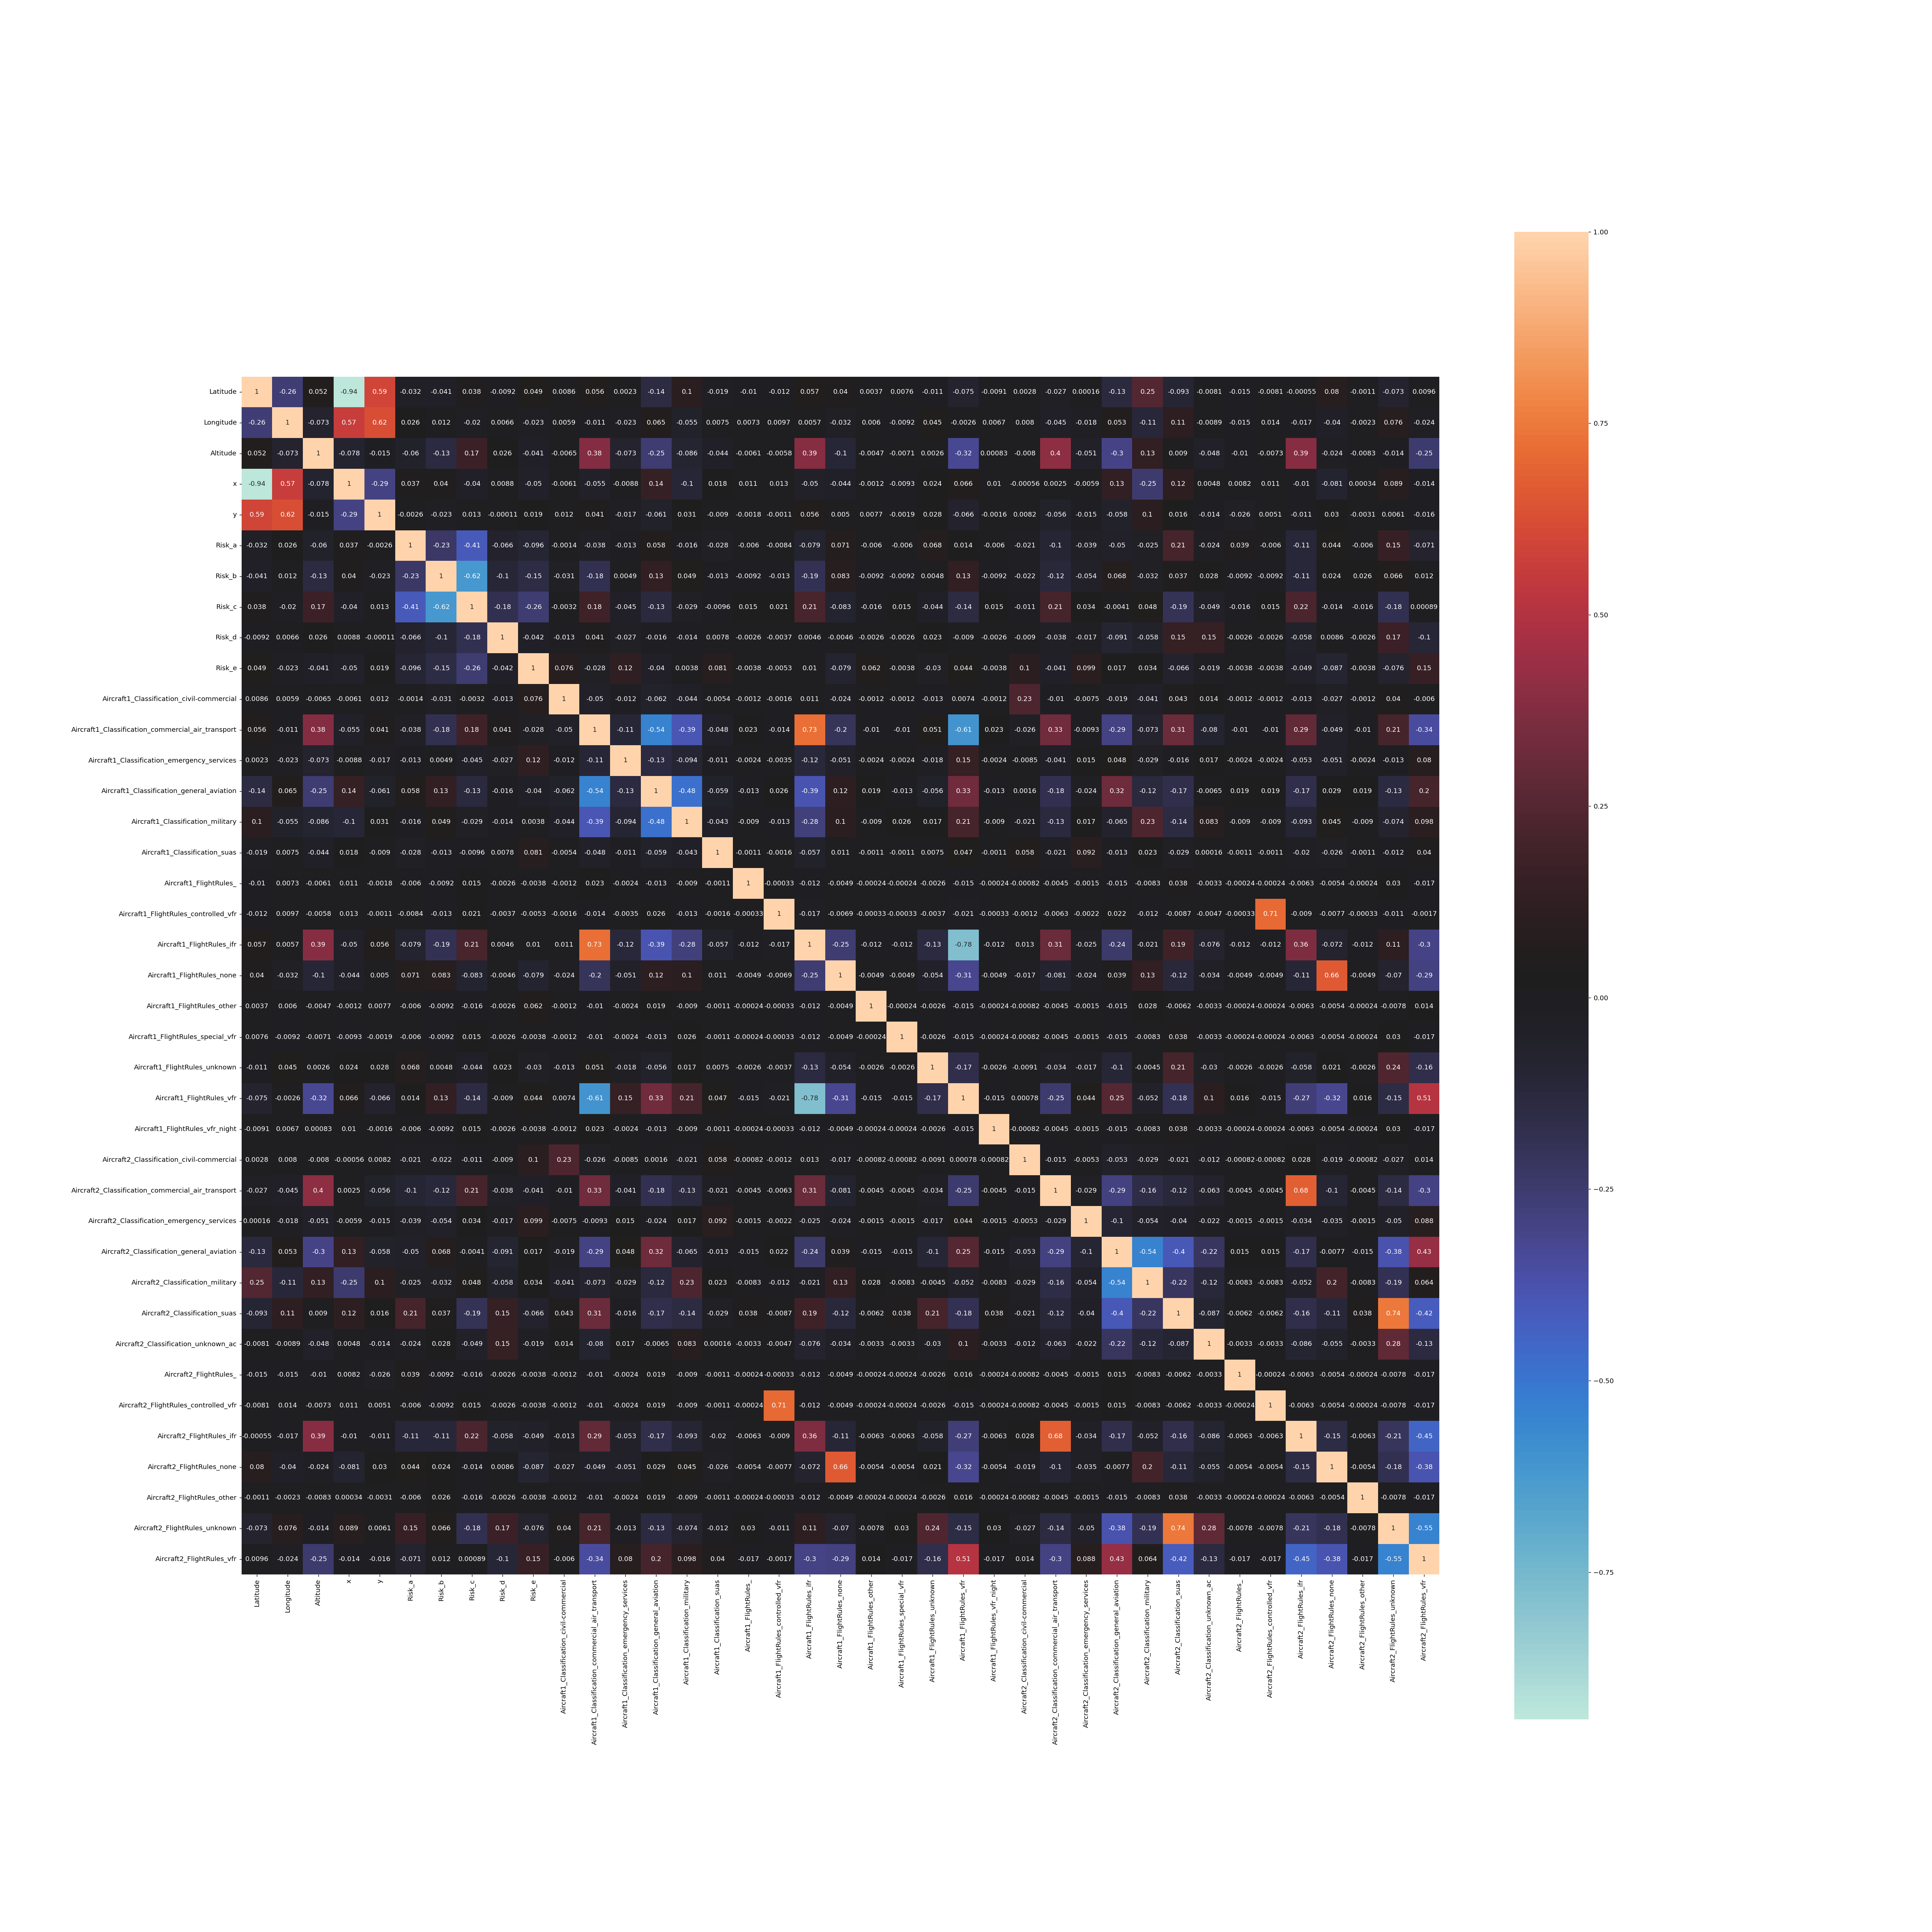

In [149]:
corr = enc_df.corr()
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr, square=True, cmap=sns.color_palette('icefire', as_cmap=True), annot=True, ax=ax)
plt.savefig('corr.svg', dpi=500)

In [12]:
import pyproj

In [99]:
transformer = pyproj.Transformer.from_proj(pyproj.Proj("epsg:4326"), crs.LambertConformal(), always_xy=True)
x, y = transformer.transform(
    data_df.Longitude.values,
    data_df.Latitude.values,
)
data_df = data_df.assign(x=x, y=y)

In [100]:
res = 50 #m
data_agg = data_df.assign(x=lambda row: (row.x //res) * res, y=lambda row: (row.y //res) * res).groupby(['x', 'y']).agg(["count"], altitude="mean").reset_index()

<IPython.core.display.Javascript object>


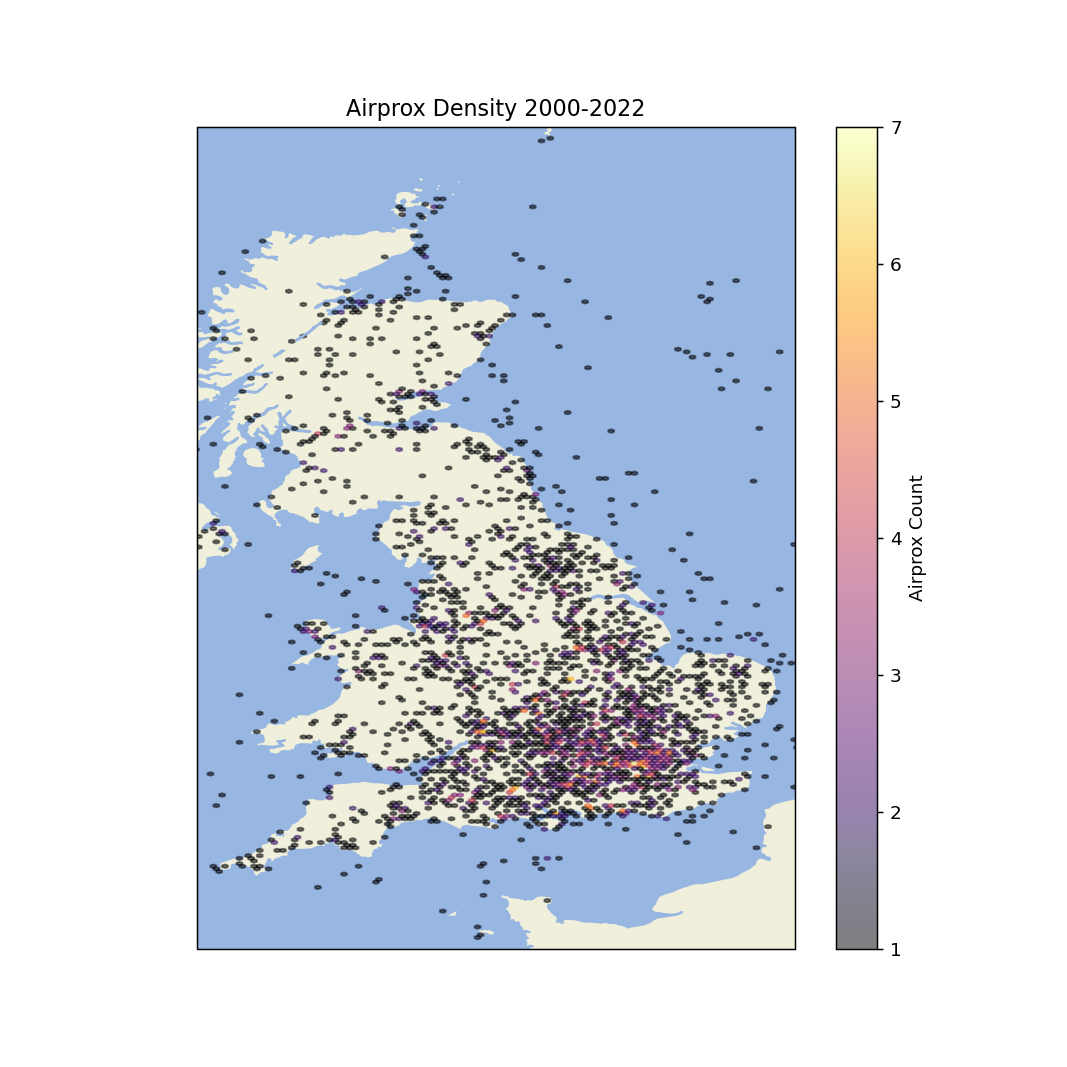

In [161]:
# data_agg.plot('x', 'y', kind='hexbin', gridsize=600, transform=crs.PlateCarree())
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=crs.PlateCarree())
ax.set_title('Airprox Density 2000-2022')
hb = ax.hexbin(data_agg.x, data_agg.y, gridsize=400, transform=crs.LambertConformal(), cmap='inferno', alpha=0.5, mincnt=1)
fig.colorbar(hb, label='Airprox Count')
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.LAKES)
ax.set_extent([-6, 2, 49, 60])